<a href="https://colab.research.google.com/github/Shaikmd3797/find-adopted-users-/blob/main/take_home_users_problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [205]:
#import all necessary libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import json
from datetime import datetime ,timedelta
import scipy.stats


The data is available in two csv files one is 
1.   takehome_users.csv and the another one is
2.   takehome_user_engagement.csv


In [206]:
users=pd.read_csv('takehome_users.csv',parse_dates = ['creation_time'], encoding="CP1252")
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [207]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 937.6+ KB


## **users has contained object id, creation time,user name,email,creation source,last session creation time etc..**

In [208]:
users_engg=pd.read_csv('takehome_user_engagement.csv', parse_dates = ['time_stamp'], encoding='cp1252')
users_engg.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [209]:
users_engg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


***takehome_users_engagement.csv file contains user_id,visiting count, visiting time*** 

In [210]:
users_engg.user_id.nunique()

8823

# ***Project***
Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven day period, identify which factors predict future user adoption.

We suggest spending 1-2 hours on this, but you're welcome to spend more or less.

1.   Please send us a brief write-up of your findings (the more concise, the better no more than one page), along with any summary tables, graphs, code, or queries that can help us understand your approach.
2.   Please note any factors you considered or investigation you did, even if they did not pan out. Feel free to identify any further research or data you think would be valuable.







# ***Thoughts***:

***takehome_users:*** 

Need to make sure the date/time variables are coded as such. One of the column titles is inconsistent with the data description. Certainly not all of the data is going to be useful, certainly not the personal details of the users.

***takehome_user_engagement:***

The time stamp is going to need to be changed

a. I'm already thinking that the data are going to need to be merged between the user_engagement dataset and the user dataset.
b. Since the question mentioned seven day units I will need to code weekly units.

In [211]:
# in users dataframe contains some of null values in last_session creation time,invited_by_user_id
# in users, last session creation time will change into date time datatype
users['last_session_creation_time']=pd.to_datetime(users['last_session_creation_time'])
users.last_session_creation_time.dtypes

dtype('<M8[ns]')

In [212]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240.0


In [213]:
users_engg=users_engg.drop_duplicates()
users_engg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 6.3 MB


In [214]:
users.creation_time=pd.to_datetime(users['creation_time'])
users['user_id']=users['object_id']
users_engg['time_stamp']=pd.to_datetime(users_engg['time_stamp'])

In [215]:
# in users_engg has time stamp data as a object datatype 
# now we will change our object datatype into datetime datatype
users_engg['date']=pd.to_datetime(users_engg.time_stamp.dt.date)
users_engg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
 3   date        207917 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2)
memory usage: 7.9 MB


## ***For determining which users can be labeled as adopted users, we can use groupby and rolling methods to find the users who were active for more than 3 days in any of the 7 day rolling period.***

In [216]:
def rolling_count(users_engg_group, frequency):
    return users_engg_group.rolling(frequency, on='date')['user_id'].count()
users_engg['week_visitors'] = users_engg.groupby('user_id', as_index=False, group_keys=False).apply(rolling_count, '7D')
users_engg.head()

,time_stamp,user_id,visited,date,week_visitors
0,2014-04-22 03:53:30,1,1,2014-04-22,1.0
1,2013-11-15 03:45:04,2,1,2013-11-15,1.0
2,2013-11-29 03:45:04,2,1,2013-11-29,1.0
3,2013-12-09 03:45:04,2,1,2013-12-09,1.0
4,2013-12-25 03:45:04,2,1,2013-12-25,1.0


In [218]:
users_engg[users_engg. week_visitors >= 3]
#this take repeated user_id to visits more than 3 days 

,time_stamp,user_id,visited,date,week_visitors
9,2014-02-09 03:45:04,2,1,2014-02-09,3.0
10,2014-02-13 03:45:04,2,1,2014-02-13,3.0
27,2013-02-19 22:08:03,10,1,2013-02-19,3.0
30,2013-03-02 22:08:03,10,1,2013-03-02,3.0
31,2013-03-05 22:08:03,10,1,2013-03-05,3.0
...,...,...,...,...,...
207898,2014-05-23 11:04:47,11988,1,2014-05-23,6.0
207899,2014-05-24 11:04:47,11988,1,2014-05-24,6.0
207900,2014-05-26 11:04:47,11988,1,2014-05-26,5.0
207901,2014-05-27 11:04:47,11988,1,2014-05-27,5.0


# ***Now we take the groupby of user_id and get maximum of visiting frequency***

In [219]:
user_frequent=users_engg.groupby('user_id')['week_visitors'].max().reset_index()
user_frequent

,user_id,week_visitors
0,1,1.0
1,2,3.0
2,3,1.0
3,4,1.0
4,5,1.0
...,...,...
8818,11996,1.0
8819,11997,1.0
8820,11998,1.0
8821,11999,1.0


In [220]:
user_frequent['adopted_user'] = user_frequent['week_visitors'].apply(lambda a: 1 if a>=3 else 0)
user_frequent.head()


,user_id,week_visitors,adopted_user
0,1,1.0,0
1,2,3.0,1
2,3,1.0,0
3,4,1.0,0
4,5,1.0,0


In [221]:
user_frequent.adopted_user.value_counts()

0    7221
1    1602
Name: adopted_user, dtype: int64

# ***now we join the adoped_user to real dataframe as a users***

In [222]:
user_frequent.rename(columns={"user_id": "object_id"}, inplace=True)
user_frequent.set_index('object_id',inplace=True)

In [223]:
df_users = users.join(user_frequent, on = 'object_id', how='left')

In [224]:
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,week_visitors,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0,1,1.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,2,3.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525.0,3,1.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151.0,4,1.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240.0,5,1.0,0.0


In [225]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
 10  user_id                     12000 non-null  int64         
 11  week_visitors               8823 non-null   float64   

In [226]:
#fill zeros at null values in last_session_creation_time,adoped_user,week_visitors
df_users['last_session_creation_time'].fillna(0, inplace = True)
df_users['adopted_user'].fillna(0, inplace = True)
df_users['week_visitors'].fillna(0,inplace =True)

In [227]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  12000 non-null  object        
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
 10  user_id                     12000 non-null  int64         
 11  week_visitors               12000 non-null  float64   

In [228]:
# Also checking the creation_source for NON NULL invited_by_user column
df_users[~df_users.invited_by_user_id.isnull()].creation_source.unique()

array(['GUEST_INVITE', 'ORG_INVITE'], dtype=object)

# ***now we drop the unwanted columns like name , email,week_visitorsand etc...***

In [229]:
df_users.drop(['name','email','week_visitors','object_id'],axis=1,inplace=True)

In [230]:
#And for the invited_by_user_id let's convert the NULL values to 0 because the column has a Non Null value only if the creation_source was a GUEST_INVITE or a ORG_INVITE anyways.
df_users.invited_by_user_id.fillna(0,inplace=True)

In [231]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   creation_time               12000 non-null  datetime64[ns]
 1   creation_source             12000 non-null  object        
 2   last_session_creation_time  12000 non-null  object        
 3   opted_in_to_mailing_list    12000 non-null  int64         
 4   enabled_for_marketing_drip  12000 non-null  int64         
 5   org_id                      12000 non-null  int64         
 6   invited_by_user_id          12000 non-null  float64       
 7   user_id                     12000 non-null  int64         
 8   adopted_user                12000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 843.9+ KB


# ***now we will give the one hot coding to the colomn of creation source***

In [232]:
df_users=pd.get_dummies(df_users,columns=['creation_source'])

In [233]:
df_users.head()

,creation_time,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,adopted_user,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,2014-04-22 03:53:30,1970-01-01 00:00:01.398138810,1,0,11,10803.0,1,0.0,1,0,0,0,0
1,2013-11-15 03:45:04,1970-01-01 00:00:01.396237504,0,0,1,316.0,2,1.0,0,1,0,0,0
2,2013-03-19 23:14:52,1970-01-01 00:00:01.363734892,0,0,94,1525.0,3,0.0,0,1,0,0,0
3,2013-05-21 08:09:28,1970-01-01 00:00:01.369210168,0,0,1,5151.0,4,0.0,1,0,0,0,0
4,2013-01-17 10:14:20,1970-01-01 00:00:01.358849660,0,0,193,5240.0,5,0.0,1,0,0,0,0


In [234]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   creation_time                       12000 non-null  datetime64[ns]
 1   last_session_creation_time          12000 non-null  object        
 2   opted_in_to_mailing_list            12000 non-null  int64         
 3   enabled_for_marketing_drip          12000 non-null  int64         
 4   org_id                              12000 non-null  int64         
 5   invited_by_user_id                  12000 non-null  float64       
 6   user_id                             12000 non-null  int64         
 7   adopted_user                        12000 non-null  float64       
 8   creation_source_GUEST_INVITE        12000 non-null  uint8         
 9   creation_source_ORG_INVITE          12000 non-null  uint8         
 10  creation_source_PERSON

In [235]:
df_users.drop(['user_id'],axis=1,inplace=True)

# ***In df_users,datatype of  creation_time,last_session_creation_time is converted into float or integer for finding correlation***

In [236]:
#adopted user can explain and sense to last_session_creation_time,so we can drop that column
df_users.drop(['last_session_creation_time'], axis=1 ,inplace=True)

In [237]:
#For the creation_time column let's add a column which calculates how old the account is, i.e. the number of days since the account was created.
df_users['days_since_creation'] = (users_engg.time_stamp.max() - df_users.creation_time).dt.days

In [238]:
df_users.drop(['creation_time'], axis=1 ,inplace=True)

In [239]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   opted_in_to_mailing_list            12000 non-null  int64  
 1   enabled_for_marketing_drip          12000 non-null  int64  
 2   org_id                              12000 non-null  int64  
 3   invited_by_user_id                  12000 non-null  float64
 4   adopted_user                        12000 non-null  float64
 5   creation_source_GUEST_INVITE        12000 non-null  uint8  
 6   creation_source_ORG_INVITE          12000 non-null  uint8  
 7   creation_source_PERSONAL_PROJECTS   12000 non-null  uint8  
 8   creation_source_SIGNUP              12000 non-null  uint8  
 9   creation_source_SIGNUP_GOOGLE_AUTH  12000 non-null  uint8  
 10  days_since_creation                 12000 non-null  int64  
dtypes: float64(2), int64(4), uint8(5)
memory 

In [241]:
#correlation between adopted users and other columns
df_users.corr()['adopted_user']

opted_in_to_mailing_list              0.008097
enabled_for_marketing_drip            0.004653
org_id                                0.064523
invited_by_user_id                    0.021596
adopted_user                          1.000000
creation_source_GUEST_INVITE          0.045408
creation_source_ORG_INVITE           -0.007636
creation_source_PERSONAL_PROJECTS    -0.075817
creation_source_SIGNUP                0.009299
creation_source_SIGNUP_GOOGLE_AUTH    0.036119
days_since_creation                   0.088020
Name: adopted_user, dtype: float64

# ***TEST/TRAIN SPLIT***

In [242]:
from sklearn.model_selection import train_test_split
X=df_users[list(pd.Series(df_users.columns)[pd.Series(df_users.columns)!='adopted_user'])].values
y=df_users['adopted_user'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state=7)
print('Train size:',(len(X_train)/len(X))*100)
print('Train observations:',(len(X_train)))
print('Test size:',(len(X_test)/len(X))*100)
print('Test observations:',(len(X_test)))

Train size: 75.0
Train observations: 9000
Test size: 25.0
Test observations: 3000


# ***Let's try to fit Random Forest Regression model and find the feature importance. Since we will be using random forest using trees we don't need to scale any features.***

In [243]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [244]:
clf = RandomForestClassifier(n_estimators=20,random_state=5,criterion='gini', class_weight='balanced')

In [245]:
clf.fit(X_train, y_train)
Accuracy=clf.score(X_train, y_train)
print('Accuracy:',Accuracy,'\n')

Accuracy: 0.9894444444444445 



In [246]:
importFeature = clf.feature_importances_
feature_importances=pd.DataFrame([importFeature])

In [247]:
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
indices = np.argsort(importFeature)[::-1]


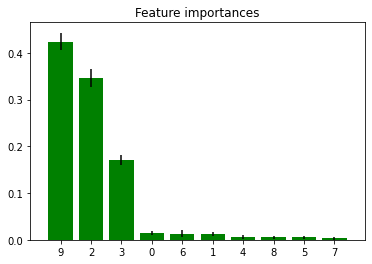

In [248]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importFeature[indices],color="g", yerr=std[indices],align='center')
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [249]:
col_names=list(pd.Series(df_users.columns)[pd.Series(df_users.columns)!='adopted_user'])
feature_importances=pd.DataFrame(pd.Series(col_names)[indices])
feature_importances['importance']=np.sort(importFeature)[::-1]
feature_importances.columns=['features','importance']
feature_importances


,features,importance
9,days_since_creation,0.424290
2,org_id,0.345460
3,invited_by_user_id,0.171148
0,opted_in_to_mailing_list,0.014177
6,creation_source_PERSONAL_PROJECTS,0.013379
1,enabled_for_marketing_drip,0.011826
4,creation_source_GUEST_INVITE,0.005837
8,creation_source_SIGNUP_GOOGLE_AUTH,0.005106
5,creation_source_ORG_INVITE,0.005020
7,creation_source_SIGNUP,0.003758


# The top 5 important features seem to be:

## 1) days_since_creation
## 2)org_id
## 3) invited_by_user_id
## 4)opted_in_to_mailing_list
## 5)creation_source_PERSONAL_PROJECTS
Furture possible work: We can also add a feature which calculates the difference between the creation date of the account and the first login of the user.